<a href="https://colab.research.google.com/github/VikkiSui1129/6289HW/blob/main/HW2_Sui_Vikki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training an image classifier
We will do the following steps in order:

Load and normalize the CIFAR10 training and test datasets using torchvision

Define a Convolutional Neural Network

Define a loss function

Train the network on the training data

Test the network on the test data

***Load and normalize CIFAR10****

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.

torch.Size([4, 3, 32, 32])


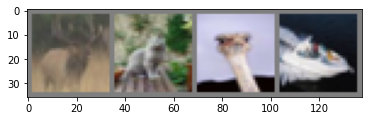

deer  cat   bird  ship 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Define a Convolutional Neural Network

modify it to take 3-channel images

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
'''
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net1 = nn.Sequential(
                        nn.Flatten(),
                        nn.Linear(3 * 32 * 32, 512),
                        nn.ReLU(),
                        nn.Dropout(p=0.5),
                        nn.Linear(512, 10)
                    )

    def forward(self, x):
        x = self.net1(x)
        return x


net1 = Net1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.1, momentum=0.9)
'''

Train the network

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
net0 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 32 * 32, 10)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net0.parameters(), lr=0.001, momentum=0.9)

acc_0 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net0(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_0.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net0.pth'
    torch.save(net0.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_0)

[1,  4000] loss: 2.167
[1,  8000] loss: 2.153
[1, 12000] loss: 2.145
current accuracy is: 0.3149
[2,  4000] loss: 2.104
[2,  8000] loss: 2.082
[2, 12000] loss: 2.127
current accuracy is: 0.3467
[3,  4000] loss: 2.061
[3,  8000] loss: 2.094
[3, 12000] loss: 2.099
current accuracy is: 0.346
[4,  4000] loss: 2.036
[4,  8000] loss: 2.057
[4, 12000] loss: 2.113
current accuracy is: 0.2902
[5,  4000] loss: 2.044
[5,  8000] loss: 2.082
[5, 12000] loss: 2.059
current accuracy is: 0.3092
[6,  4000] loss: 2.031
[6,  8000] loss: 2.062
[6, 12000] loss: 2.065
current accuracy is: 0.3388
[7,  4000] loss: 2.006
[7,  8000] loss: 2.035
[7, 12000] loss: 2.086
current accuracy is: 0.3272
[8,  4000] loss: 2.003
[8,  8000] loss: 2.036
[8, 12000] loss: 2.078
current accuracy is: 0.3486
[9,  4000] loss: 2.014
[9,  8000] loss: 2.047
[9, 12000] loss: 2.060
current accuracy is: 0.3494
[10,  4000] loss: 1.978
[10,  8000] loss: 2.060
[10, 12000] loss: 2.062
current accuracy is: 0.3444
Finished Training
[0.3149, 0

In [ ]:
net1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 32 * 32, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 10)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)

acc_1 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net1(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_1.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net1.pth'
    torch.save(net1.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_1)

[1,  4000] loss: 1.889
[1,  8000] loss: 1.870
[1, 12000] loss: 1.884
current accuracy is: 0.3716
[2,  4000] loss: 1.860
[2,  8000] loss: 1.852
[2, 12000] loss: 1.840
current accuracy is: 0.3802
[3,  4000] loss: 1.802
[3,  8000] loss: 1.835
[3, 12000] loss: 1.860
current accuracy is: 0.3976


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


[4,  4000] loss: 1.786
[4,  8000] loss: 1.800
[4, 12000] loss: 1.805


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


current accuracy is: 0.4239


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
AssertionError: can only test a child process
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

[5,  4000] loss: 1.745
[5,  8000] loss: 1.790
[5, 12000] loss: 1.788


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

current accuracy is: 0.3956


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

[6,  4000] loss: 1.739
[6,  8000] loss: 1.750
[6, 12000] loss: 1.771


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Traceback (most recent call last):
AssertionError: can only test a child process
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

current accuracy is: 0.4112


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f60304173b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

[7,  4000] loss: 1.698
[7,  8000] loss: 1.750
[7, 12000] loss: 1.729
current accuracy is: 0.4256
[8,  4000] loss: 1.691
[8,  8000] loss: 1.723
[8, 12000] loss: 1.719
current accuracy is: 0.4247
[9,  4000] loss: 1.653
[9,  8000] loss: 1.679
[9, 12000] loss: 1.693
current accuracy is: 0.4106
[10,  4000] loss: 1.643
[10,  8000] loss: 1.663
[10, 12000] loss: 1.658
current accuracy is: 0.4389
Finished Training
[0.3716, 0.3802, 0.3976, 0.4239, 0.3956, 0.4112, 0.4256, 0.4247, 0.4106, 0.4389]


In [ ]:
net2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 32 * 32, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 10)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

acc_2 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net2(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_2.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net2.pth'
    torch.save(net2.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_2)

[1,  4000] loss: 1.928
[1,  8000] loss: 1.801
[1, 12000] loss: 1.753
current accuracy is: 0.3894
[2,  4000] loss: 1.709
[2,  8000] loss: 1.697
[2, 12000] loss: 1.678
current accuracy is: 0.4043
[3,  4000] loss: 1.657
[3,  8000] loss: 1.641
[3, 12000] loss: 1.659
current accuracy is: 0.4061
[4,  4000] loss: 1.628
[4,  8000] loss: 1.616
[4, 12000] loss: 1.631
current accuracy is: 0.4207
[5,  4000] loss: 1.588
[5,  8000] loss: 1.616
[5, 12000] loss: 1.602
current accuracy is: 0.4244
[6,  4000] loss: 1.571
[6,  8000] loss: 1.584
[6, 12000] loss: 1.596
current accuracy is: 0.4232
[7,  4000] loss: 1.567
[7,  8000] loss: 1.561
[7, 12000] loss: 1.574
current accuracy is: 0.4181
[8,  4000] loss: 1.532
[8,  8000] loss: 1.568
[8, 12000] loss: 1.563
current accuracy is: 0.4254
[9,  4000] loss: 1.533
[9,  8000] loss: 1.547
[9, 12000] loss: 1.547
current accuracy is: 0.4335
[10,  4000] loss: 1.519
[10,  8000] loss: 1.530
[10, 12000] loss: 1.531
current accuracy is: 0.4405
Finished Training
[0.3894, 

In [ ]:
net3 = nn.Sequential(
    nn.Flatten(),
    # 1
    nn.Linear(3 * 32 * 32, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 2
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 3
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 10)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)

acc_3 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net3(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_3.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net3.pth'
    torch.save(net3.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_3)

[1,  4000] loss: 2.010
[1,  8000] loss: 1.833
[1, 12000] loss: 1.787
current accuracy is: 0.3749
[2,  4000] loss: 1.729
[2,  8000] loss: 1.710
[2, 12000] loss: 1.705
current accuracy is: 0.4002
[3,  4000] loss: 1.664
[3,  8000] loss: 1.651
[3, 12000] loss: 1.647
current accuracy is: 0.4182
[4,  4000] loss: 1.623
[4,  8000] loss: 1.618
[4, 12000] loss: 1.609
current accuracy is: 0.4232
[5,  4000] loss: 1.591
[5,  8000] loss: 1.590
[5, 12000] loss: 1.590
current accuracy is: 0.4286
[6,  4000] loss: 1.556
[6,  8000] loss: 1.572
[6, 12000] loss: 1.582
current accuracy is: 0.4383
[7,  4000] loss: 1.541
[7,  8000] loss: 1.549
[7, 12000] loss: 1.567
current accuracy is: 0.437
[8,  4000] loss: 1.538
[8,  8000] loss: 1.542
[8, 12000] loss: 1.543
current accuracy is: 0.4343
[9,  4000] loss: 1.530
[9,  8000] loss: 1.524
[9, 12000] loss: 1.542
current accuracy is: 0.4371
[10,  4000] loss: 1.510
[10,  8000] loss: 1.518
[10, 12000] loss: 1.537
current accuracy is: 0.4334
Finished Training
[0.3749, 0

In [ ]:
net4 = nn.Sequential(
    nn.Flatten(),
    # 1
    nn.Linear(3 * 32 * 32, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 2
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 3
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 4
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 10)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)

acc_4 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net4(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_4.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net4.pth'
    torch.save(net4.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_4)

[1,  4000] loss: 2.128
[1,  8000] loss: 1.914
[1, 12000] loss: 1.831
current accuracy is: 0.3569
[2,  4000] loss: 1.775
[2,  8000] loss: 1.746
[2, 12000] loss: 1.725
current accuracy is: 0.3904
[3,  4000] loss: 1.688
[3,  8000] loss: 1.673
[3, 12000] loss: 1.677
current accuracy is: 0.4149
[4,  4000] loss: 1.635
[4,  8000] loss: 1.629
[4, 12000] loss: 1.619
current accuracy is: 0.4155
[5,  4000] loss: 1.591
[5,  8000] loss: 1.597
[5, 12000] loss: 1.597
current accuracy is: 0.4288
[6,  4000] loss: 1.575
[6,  8000] loss: 1.593
[6, 12000] loss: 1.573
current accuracy is: 0.4322
[7,  4000] loss: 1.558
[7,  8000] loss: 1.556
[7, 12000] loss: 1.563
current accuracy is: 0.4495
[8,  4000] loss: 1.543
[8,  8000] loss: 1.535
[8, 12000] loss: 1.550
current accuracy is: 0.4426
[9,  4000] loss: 1.535
[9,  8000] loss: 1.524
[9, 12000] loss: 1.527
current accuracy is: 0.4417
[10,  4000] loss: 1.505
[10,  8000] loss: 1.513
[10, 12000] loss: 1.520
current accuracy is: 0.4374
Finished Training
[0.3569, 

In [ ]:
class Net5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net5 = Net5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net5.parameters(), lr=0.001, momentum=0.9)

acc_5 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net5(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_5.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net5.pth'
    torch.save(net5.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_5)

[1,  4000] loss: 2.050
[1,  8000] loss: 1.653
[1, 12000] loss: 1.513
current accuracy is: 0.4677
[2,  4000] loss: 1.414
[2,  8000] loss: 1.345
[2, 12000] loss: 1.311
current accuracy is: 0.5204
[3,  4000] loss: 1.240
[3,  8000] loss: 1.212
[3, 12000] loss: 1.206
current accuracy is: 0.5714
[4,  4000] loss: 1.113
[4,  8000] loss: 1.138
[4, 12000] loss: 1.126
current accuracy is: 0.5825
[5,  4000] loss: 1.045
[5,  8000] loss: 1.052
[5, 12000] loss: 1.057
current accuracy is: 0.6029
[6,  4000] loss: 0.978
[6,  8000] loss: 0.993
[6, 12000] loss: 1.012
current accuracy is: 0.6152
[7,  4000] loss: 0.918
[7,  8000] loss: 0.957
[7, 12000] loss: 0.964
current accuracy is: 0.6256
[8,  4000] loss: 0.870
[8,  8000] loss: 0.900
[8, 12000] loss: 0.945
current accuracy is: 0.6136
[9,  4000] loss: 0.843
[9,  8000] loss: 0.875
[9, 12000] loss: 0.890
current accuracy is: 0.6192
[10,  4000] loss: 0.810
[10,  8000] loss: 0.842
[10, 12000] loss: 0.869
current accuracy is: 0.6172
Finished Training
[0.4677, 

In [ ]:
acc_0 = [0.3149, 0.3467, 0.346, 0.2902, 0.3092, 0.3388, 0.3272, 0.3486, 0.3494, 0.3444]
acc_1 = [0.3716, 0.3802, 0.3976, 0.4239, 0.3956, 0.4112, 0.4256, 0.4247, 0.4106, 0.4389]
acc_2 = [0.3894, 0.4043, 0.4061, 0.4207, 0.4244, 0.4232, 0.4181, 0.4254, 0.4335, 0.4405]
acc_3 = [0.3749, 0.4002, 0.4182, 0.4232, 0.4286, 0.4383, 0.437, 0.4343, 0.4371, 0.4334]
acc_4 = [0.3569, 0.3904, 0.4149, 0.4155, 0.4288, 0.4322, 0.4495, 0.4426, 0.4417, 0.4374]
acc_5 = [0.4677, 0.5204, 0.5714, 0.5825, 0.6029, 0.6152, 0.6256, 0.6136, 0.6192, 0.6172]

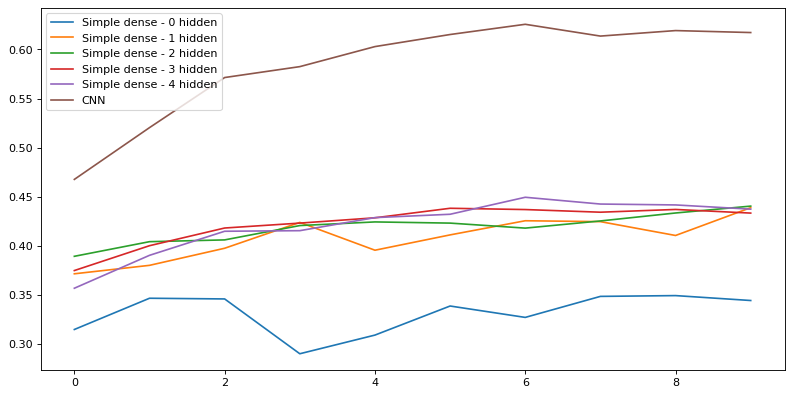

In [ ]:
epochs = np.arange(10)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs, acc_0, label="Simple dense - 0 hidden")
plt.plot(epochs, acc_1, label="Simple dense - 1 hidden")
plt.plot(epochs, acc_2, label="Simple dense - 2 hidden")
plt.plot(epochs, acc_3, label="Simple dense - 3 hidden")
plt.plot(epochs, acc_4, label="Simple dense - 4 hidden")
plt.plot(epochs, acc_5, label="CNN")
plt.legend()
plt.show()

As the number of hidden layers increases, there is a shape increase from 0 to 1 hidden layer, but there is no big improvement from 1 hidden layer to 4 hidden layers. This is because adding the first hidden layer will increase the number of parameter a lot, but that size of parameter is probably enough for the model, so adding more hidden layers did not improve the test accuracy. Besides, the convolutional neural network has the highest accuracy. The 2D convolution can learn local information from neighbor pixels. It can catch more 2D information while the dense layers can only learn 1D information. 

(b)

In [ ]:
class Net6(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net6 = Net6()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net6.parameters(), lr=0.001, momentum=0.9)

acc_6 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net6(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_6.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net6.pth'
    torch.save(net6.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_6)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  4000] loss: 2.315
[1,  8000] loss: 2.314
[1, 12000] loss: 2.312
current accuracy is: 0.1
[2,  4000] loss: 2.310
[2,  8000] loss: 2.309
[2, 12000] loss: 2.307
current accuracy is: 0.1
[3,  4000] loss: 2.306
[3,  8000] loss: 2.305
[3, 12000] loss: 2.305
current accuracy is: 0.1
[4,  4000] loss: 2.305
[4,  8000] loss: 2.305
[4, 12000] loss: 2.305
current accuracy is: 0.1
[5,  4000] loss: 2.305
[5,  8000] loss: 2.304
[5, 12000] loss: 2.304
current accuracy is: 0.1
[6,  4000] loss: 2.304
[6,  8000] loss: 2.304
[6, 12000] loss: 2.304
current accuracy is: 0.1
[7,  4000] loss: 2.304
[7,  8000] loss: 2.304
[7, 12000] loss: 2.303
current accuracy is: 0.1
[8,  4000] loss: 2.303
[8,  8000] loss: 2.303
[8, 12000] loss: 2.302
current accuracy is: 0.1
[9,  4000] loss: 2.300
[9,  8000] loss: 2.295
[9, 12000] loss: 2.274
current accuracy is: 0.1766
[10,  4000] loss: 2.172
[10,  8000] loss: 2.083
[10, 12000] loss: 2.067
current accuracy is: 0.1919
Finished Training
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.

In [ ]:
acc_6 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1766, 0.1919]

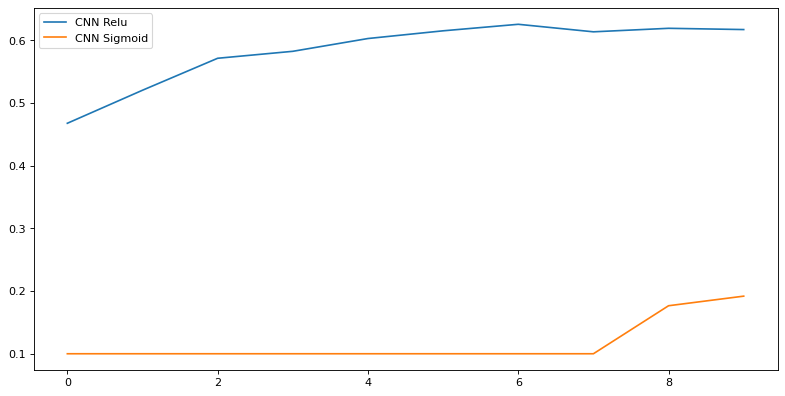

In [ ]:
epochs = np.arange(10)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs, acc_5, label="CNN Relu")
plt.plot(epochs, acc_6, label="CNN Sigmoid")
plt.legend()
plt.show()

When changing all Relu to Sigmoid, the network performs worse. Although at the beginning the network always give the random output (10% accuracy), after enough epochs, the network will perform better than current test accuracy.

Compared with the sigmoid, ReLU has a huge acceleration effect on the convergence of stochastic gradient descent. Sigmoid contains exponential operations during derivation, while ReLU derivation has almost no computation. 

(c)

In [ ]:
class Net7(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop_out = nn.Dropout(0.5)
        self.drop_out2d = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop_out2d(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop_out2d(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.drop_out(x)
        x = F.relu(self.fc2(x))
        x = self.drop_out(x)
        x = self.fc3(x)
        return x


net7 = Net7()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net7.parameters(), lr=0.001, momentum=0.9)

acc_7_train = []
acc_7_test = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net7(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    acc_7_train.append(correct/total)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net7(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_7_test.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net7.pth'
    torch.save(net7.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_7_train)
print(acc_7_test)

[1,  4000] loss: 2.164
[1,  8000] loss: 1.948
[1, 12000] loss: 1.867
current accuracy is: 0.3026
[2,  4000] loss: 1.799
[2,  8000] loss: 1.770
[2, 12000] loss: 1.738
current accuracy is: 0.3619
[3,  4000] loss: 1.737
[3,  8000] loss: 1.724
[3, 12000] loss: 1.700
current accuracy is: 0.3774
[4,  4000] loss: 1.707
[4,  8000] loss: 1.686
[4, 12000] loss: 1.692
current accuracy is: 0.3823
[5,  4000] loss: 1.670
[5,  8000] loss: 1.677
[5, 12000] loss: 1.680
current accuracy is: 0.3819
[6,  4000] loss: 1.652
[6,  8000] loss: 1.665
[6, 12000] loss: 1.672
current accuracy is: 0.3841
[7,  4000] loss: 1.664
[7,  8000] loss: 1.667
[7, 12000] loss: 1.638
current accuracy is: 0.4051
[8,  4000] loss: 1.648
[8,  8000] loss: 1.658
[8, 12000] loss: 1.651
current accuracy is: 0.3992
[9,  4000] loss: 1.642
[9,  8000] loss: 1.650
[9, 12000] loss: 1.651
current accuracy is: 0.3979
[10,  4000] loss: 1.661
[10,  8000] loss: 1.641
[10, 12000] loss: 1.662
current accuracy is: 0.3935
[11,  4000] loss: 1.633
[11

In [ ]:
class Net8(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net8 = Net8()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net8.parameters(), lr=0.001, momentum=0.9)

acc_8_train = []
acc_8_test = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net8(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    acc_8_train.append(correct/total)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net8(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_8_test.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net8.pth'
    torch.save(net8.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_8_train)
print(acc_8_test)

[1,  4000] loss: 2.050
[1,  8000] loss: 1.627
[1, 12000] loss: 1.484
current accuracy is: 0.4958
[2,  4000] loss: 1.370
[2,  8000] loss: 1.321
[2, 12000] loss: 1.284
current accuracy is: 0.5589
[3,  4000] loss: 1.201
[3,  8000] loss: 1.184
[3, 12000] loss: 1.177
current accuracy is: 0.5917
[4,  4000] loss: 1.094
[4,  8000] loss: 1.100
[4, 12000] loss: 1.107
current accuracy is: 0.6081
[5,  4000] loss: 1.012
[5,  8000] loss: 1.044
[5, 12000] loss: 1.035
current accuracy is: 0.6093
[6,  4000] loss: 0.963
[6,  8000] loss: 0.974
[6, 12000] loss: 0.999
current accuracy is: 0.6218
[7,  4000] loss: 0.920
[7,  8000] loss: 0.927
[7, 12000] loss: 0.953
current accuracy is: 0.6108
[8,  4000] loss: 0.859
[8,  8000] loss: 0.892
[8, 12000] loss: 0.924
current accuracy is: 0.6231
[9,  4000] loss: 0.825
[9,  8000] loss: 0.874
[9, 12000] loss: 0.879
current accuracy is: 0.6243
[10,  4000] loss: 0.788
[10,  8000] loss: 0.833
[10, 12000] loss: 0.864
current accuracy is: 0.6099
[11,  4000] loss: 0.781
[11

In [ ]:
def horizontal_flip(image):
    HF = transforms.RandomHorizontalFlip()
    hf_image = HF(image)
    return hf_image
def vertical_flip(image):
    VF = transforms.RandomVerticalFlip()
    vf_image = VF(image)
    return vf_image

torch.Size([1, 3, 270, 480])

In [ ]:
class Net9(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop_out = nn.Dropout(0.5)
        self.drop_out2d = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop_out2d(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop_out2d(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.drop_out(x)
        x = F.relu(self.fc2(x))
        x = self.drop_out(x)
        x = self.fc3(x)
        return x


net9 = Net9()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net9.parameters(), lr=0.001, momentum=0.9)

acc_9_train = []
acc_9_test = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = horizontal_flip(inputs)
        inputs = vertical_flip(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net9(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    acc_9_train.append(correct/total)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net9(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_9_test.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net9.pth'
    torch.save(net9.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_9_train)
print(acc_9_test)

[1,  4000] loss: 2.177
[1,  8000] loss: 2.020
[1, 12000] loss: 1.935
current accuracy is: 0.2987
[2,  4000] loss: 1.872
[2,  8000] loss: 1.837
[2, 12000] loss: 1.801
current accuracy is: 0.3425
[3,  4000] loss: 1.773
[3,  8000] loss: 1.749
[3, 12000] loss: 1.739
current accuracy is: 0.3771
[4,  4000] loss: 1.738
[4,  8000] loss: 1.716
[4, 12000] loss: 1.704
current accuracy is: 0.3707
[5,  4000] loss: 1.705
[5,  8000] loss: 1.694
[5, 12000] loss: 1.686
current accuracy is: 0.3887
[6,  4000] loss: 1.677
[6,  8000] loss: 1.677
[6, 12000] loss: 1.676
current accuracy is: 0.3865
[7,  4000] loss: 1.672
[7,  8000] loss: 1.667
[7, 12000] loss: 1.657
current accuracy is: 0.3953
[8,  4000] loss: 1.646
[8,  8000] loss: 1.650
[8, 12000] loss: 1.652
current accuracy is: 0.3985
[9,  4000] loss: 1.644
[9,  8000] loss: 1.636
[9, 12000] loss: 1.648
current accuracy is: 0.3933
[10,  4000] loss: 1.625
[10,  8000] loss: 1.639
[10, 12000] loss: 1.623
current accuracy is: 0.4024
[11,  4000] loss: 1.616
[11

In [ ]:
class Net10(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net10 = Net10()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net10.parameters(), lr=0.001, momentum=0.9)

acc_10_train = []
acc_10_test = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = horizontal_flip(inputs)
        inputs = vertical_flip(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net10(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        count += 1
        if i % 4000 == 3999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / count:.3f}')
            running_loss = 0.0
            count = 0
    acc_10_train.append(correct/total)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net10(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc_10_test.append(correct/total)
    print('current accuracy is:', correct/total)
    PATH = './cifar_net10.pth'
    torch.save(net10.state_dict(), PATH)
    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')
print(acc_10_train)
print(acc_10_test)

[1,  4000] loss: 2.111
[1,  8000] loss: 1.766
[1, 12000] loss: 1.661
current accuracy is: 0.4036
[2,  4000] loss: 1.575
[2,  8000] loss: 1.533
[2, 12000] loss: 1.488
current accuracy is: 0.4573
[3,  4000] loss: 1.446
[3,  8000] loss: 1.416
[3, 12000] loss: 1.388
current accuracy is: 0.5154
[4,  4000] loss: 1.374
[4,  8000] loss: 1.360
[4, 12000] loss: 1.306
current accuracy is: 0.5063
[5,  4000] loss: 1.299
[5,  8000] loss: 1.299
[5, 12000] loss: 1.272
current accuracy is: 0.5309
[6,  4000] loss: 1.274
[6,  8000] loss: 1.255
[6, 12000] loss: 1.234
current accuracy is: 0.5429
[7,  4000] loss: 1.224
[7,  8000] loss: 1.229
[7, 12000] loss: 1.224
current accuracy is: 0.5555
[8,  4000] loss: 1.202
[8,  8000] loss: 1.205
[8, 12000] loss: 1.194
current accuracy is: 0.5451
[9,  4000] loss: 1.167
[9,  8000] loss: 1.189
[9, 12000] loss: 1.188
current accuracy is: 0.5763
[10,  4000] loss: 1.170
[10,  8000] loss: 1.161
[10, 12000] loss: 1.151
current accuracy is: 0.5682
[11,  4000] loss: 1.136
[11

In [ ]:
acc_7_train = [0.25688, 0.33514, 0.36322, 0.38216, 0.39598, 0.40462, 0.41056, 0.42022, 0.42116, 0.42846, 0.43486, 0.43634, 0.43892, 0.44268, 0.44858, 0.44878, 0.44674, 0.45624, 0.45732, 0.45908, 0.45398, 0.45802, 0.46134, 0.4667, 0.46556, 0.46728, 0.46956, 0.47124, 0.47486, 0.46914, 0.47418, 0.47682, 0.4775, 0.4781, 0.47556, 0.4793, 0.4795, 0.4767, 0.48136, 0.4806, 0.48372, 0.48644, 0.47962, 0.4814, 0.48248, 0.48326, 0.48156, 0.4854, 0.48422, 0.4835, 0.48212, 0.48174, 0.48304, 0.48404, 0.48466, 0.48408, 0.486, 0.48648, 0.48654, 0.48196, 0.48504, 0.4847, 0.48526, 0.48522, 0.48532, 0.4859, 0.4833, 0.48362, 0.48728, 0.48568, 0.4904, 0.48236, 0.4867, 0.4901, 0.48514, 0.48604, 0.483, 0.4838, 0.48318, 0.48776, 0.48662, 0.48226, 0.48726, 0.48454, 0.48362, 0.48236, 0.4823, 0.48078, 0.48442, 0.48292, 0.48212, 0.48044, 0.47694, 0.48104, 0.4759, 0.47334, 0.4748, 0.47818, 0.47946, 0.4765]
acc_7_test = [0.3239, 0.3548, 0.37, 0.3804, 0.3749, 0.3828, 0.3882, 0.4003, 0.4122, 0.3969, 0.4051, 0.4066, 0.4103, 0.4068, 0.4043, 0.4062, 0.4142, 0.4152, 0.4129, 0.408, 0.4036, 0.4075, 0.4058, 0.41, 0.4113, 0.4029, 0.4084, 0.396, 0.4069, 0.4001, 0.3939, 0.4031, 0.3997, 0.401, 0.4011, 0.3966, 0.3945, 0.4058, 0.3975, 0.4078, 0.3954, 0.3973, 0.4018, 0.4011, 0.4009, 0.3952, 0.3949, 0.4027, 0.399, 0.3915, 0.4015, 0.3913, 0.4008, 0.3983, 0.3981, 0.3835, 0.3842, 0.3862, 0.3946, 0.3946, 0.3797, 0.3865, 0.399, 0.3879, 0.3779, 0.3731, 0.3858, 0.3877, 0.3862, 0.3906, 0.3849, 0.3845, 0.3909, 0.3962, 0.388, 0.3685, 0.3866, 0.391, 0.3908, 0.3837, 0.3838, 0.3742, 0.3846, 0.3887, 0.3804, 0.3866, 0.3865, 0.3865, 0.3744, 0.377, 0.3854, 0.3901, 0.3817, 0.3764, 0.3726, 0.3732, 0.3672, 0.3782, 0.377, 0.3762]
acc_8_train = [0.36998, 0.52594, 0.57818, 0.61028, 0.6358, 0.6542, 0.6711, 0.68358, 0.69814, 0.70572, 0.71564, 0.72354, 0.72948, 0.73526, 0.74122, 0.74364, 0.74894, 0.7562, 0.75896, 0.7618, 0.76262, 0.76634, 0.77066, 0.77244, 0.77454, 0.77782, 0.776, 0.77616, 0.78144, 0.78262, 0.78486, 0.78576, 0.7861, 0.78748, 0.78378, 0.78844, 0.7871, 0.78432, 0.78902, 0.79312, 0.79002, 0.79148, 0.79368, 0.795, 0.79002, 0.79228, 0.79434, 0.79458, 0.79004, 0.79584, 0.79022, 0.79334, 0.79848, 0.79736, 0.79366, 0.79612, 0.7928, 0.79072, 0.79434, 0.79352, 0.79312, 0.79986, 0.79152, 0.79696, 0.7962, 0.79544, 0.79772, 0.79406, 0.796, 0.79138, 0.78918, 0.79598, 0.79548, 0.7967, 0.79302, 0.79308, 0.79414, 0.79584, 0.7943, 0.79132, 0.79264, 0.79582, 0.79576, 0.79612, 0.78932, 0.7916, 0.79078, 0.78942, 0.79326, 0.79508, 0.78972, 0.78996, 0.78912, 0.78736, 0.79186, 0.79332, 0.78962, 0.78868, 0.78832, 0.79136]
acc_8_test = [0.4958, 0.5589, 0.5917, 0.6081, 0.6093, 0.6218, 0.6108, 0.6231, 0.6243, 0.6099, 0.6211, 0.621, 0.6293, 0.6115, 0.6072, 0.6147, 0.6119, 0.6221, 0.6048, 0.6133, 0.6042, 0.5908, 0.5995, 0.6059, 0.5911, 0.5993, 0.5996, 0.6041, 0.5918, 0.5948, 0.597, 0.6028, 0.5949, 0.5844, 0.5951, 0.5881, 0.5728, 0.5874, 0.6002, 0.587, 0.5895, 0.5967, 0.5949, 0.585, 0.5912, 0.5771, 0.5803, 0.5891, 0.5925, 0.5857, 0.5814, 0.586, 0.5833, 0.5873, 0.5851, 0.5826, 0.5733, 0.5837, 0.5792, 0.5774, 0.5823, 0.5737, 0.5674, 0.5786, 0.5727, 0.5765, 0.5718, 0.5835, 0.5751, 0.584, 0.5772, 0.5666, 0.5765, 0.581, 0.5761, 0.5653, 0.577, 0.5777, 0.565, 0.5694, 0.5657, 0.5676, 0.5724, 0.5651, 0.5584, 0.5636, 0.5726, 0.5631, 0.5666, 0.5812, 0.562, 0.5643, 0.5676, 0.5473, 0.5613, 0.5606, 0.562, 0.5583, 0.5479, 0.5562]
acc_9_train = [0.23044, 0.32324, 0.35656, 0.36748, 0.37722, 0.3856, 0.39474, 0.40118, 0.40662, 0.40806, 0.41166, 0.4153, 0.41578, 0.41602, 0.42076, 0.42354, 0.42644, 0.42356, 0.42888, 0.42828, 0.43304, 0.43096, 0.4368, 0.43726, 0.43566, 0.43778, 0.43904, 0.4372, 0.43934, 0.43976, 0.44256, 0.44272, 0.442, 0.4433, 0.4465, 0.44646, 0.44726, 0.44752, 0.4457, 0.44466, 0.44918, 0.4481, 0.44806, 0.44434, 0.44986, 0.44722, 0.45114, 0.44546, 0.45324, 0.44746, 0.4476, 0.45138, 0.45204, 0.45006, 0.45516, 0.45452, 0.45012, 0.4532, 0.45236, 0.45062, 0.45218, 0.45366, 0.45288, 0.44996, 0.45336, 0.4514, 0.45702, 0.45686, 0.45402, 0.45408, 0.45438, 0.45604, 0.45906, 0.45976, 0.45796, 0.45582, 0.45576, 0.46058, 0.45668, 0.45386, 0.45848, 0.46042, 0.45734, 0.4582, 0.45462, 0.46026, 0.45954, 0.45952, 0.45602, 0.45754, 0.45836, 0.4605, 0.46076, 0.46188, 0.46014, 0.46216, 0.45776, 0.45806, 0.46156, 0.45756]
acc_9_test = [0.2987, 0.3425, 0.3771, 0.3707, 0.3887, 0.3865, 0.3953, 0.3985, 0.3933, 0.4024, 0.3958, 0.4114, 0.419, 0.4132, 0.4166, 0.4109, 0.4165, 0.4169, 0.4225, 0.4152, 0.4219, 0.4297, 0.4121, 0.4324, 0.4301, 0.4174, 0.4344, 0.4209, 0.4375, 0.4369, 0.4423, 0.4397, 0.4369, 0.4332, 0.4358, 0.4368, 0.4418, 0.4395, 0.4386, 0.4442, 0.4376, 0.4399, 0.4431, 0.4297, 0.4402, 0.4443, 0.4347, 0.4385, 0.4407, 0.4475, 0.4439, 0.4422, 0.4475, 0.4357, 0.447, 0.4503, 0.4467, 0.4537, 0.4405, 0.4539, 0.4527, 0.4403, 0.4311, 0.4281, 0.4414, 0.4489, 0.445, 0.437, 0.442, 0.4506, 0.448, 0.4453, 0.4453, 0.4425, 0.4421, 0.4384, 0.4593, 0.4509, 0.4397, 0.4413, 0.4508, 0.4504, 0.452, 0.4643, 0.45, 0.4598, 0.4506, 0.455, 0.4501, 0.4423, 0.4523, 0.4438, 0.4551, 0.4394, 0.4285, 0.4395, 0.4357, 0.4594, 0.4496, 0.4352]
acc_10_train = [0.31288, 0.44106, 0.48972, 0.51468, 0.5384, 0.5533, 0.56364, 0.5746, 0.57884, 0.58846, 0.5971, 0.5983, 0.60148, 0.60522, 0.60914, 0.61312, 0.61478, 0.6168, 0.6214, 0.62234, 0.62622, 0.62758, 0.62622, 0.63004, 0.62708, 0.62896, 0.63488, 0.62926, 0.63418, 0.63896, 0.63724, 0.63842, 0.63658, 0.64012, 0.6407, 0.64056, 0.64126, 0.64254, 0.64132, 0.64278, 0.64276, 0.64228, 0.64714, 0.6463, 0.64256, 0.6434, 0.6488, 0.64984, 0.64638, 0.6526, 0.65348, 0.65104, 0.65194, 0.65082, 0.65182, 0.65124, 0.65184, 0.65192, 0.65162, 0.65122, 0.65574, 0.65532, 0.65146, 0.65416, 0.65682, 0.6549, 0.6542, 0.65426, 0.6534, 0.65724, 0.65442, 0.65562, 0.65686, 0.656, 0.65426, 0.65548, 0.65954, 0.65796, 0.6596, 0.6573, 0.66034, 0.65778, 0.65774, 0.65898, 0.65902, 0.65886, 0.65988, 0.66234, 0.66082, 0.65676, 0.66222, 0.66088, 0.65934, 0.66328, 0.66116, 0.65866, 0.66248, 0.66302, 0.66294, 0.66322]
acc_10_test = [0.4036, 0.4573, 0.5154, 0.5063, 0.5309, 0.5429, 0.5555, 0.5451, 0.5763, 0.5682, 0.5722, 0.5792, 0.589, 0.5954, 0.5638, 0.5859, 0.5772, 0.588, 0.6076, 0.5965, 0.5815, 0.5942, 0.6017, 0.5991, 0.5743, 0.5997, 0.5809, 0.5841, 0.5919, 0.5971, 0.5891, 0.5865, 0.5864, 0.5991, 0.5934, 0.6016, 0.5684, 0.6035, 0.5957, 0.5983, 0.6109, 0.5934, 0.5996, 0.5947, 0.5992, 0.6136, 0.5785, 0.5971, 0.5926, 0.6008, 0.6089, 0.5788, 0.6034, 0.6013, 0.6007, 0.6047, 0.5969, 0.6116, 0.6047, 0.6038, 0.6006, 0.6016, 0.6008, 0.5947, 0.5839, 0.6035, 0.6068, 0.6087, 0.6078, 0.602, 0.6117, 0.594, 0.6048, 0.5963, 0.5984, 0.6028, 0.5977, 0.5814, 0.6084, 0.6042, 0.6091, 0.6017, 0.6027, 0.6092, 0.5998, 0.6133, 0.6079, 0.5978, 0.592, 0.6088, 0.5976, 0.6022, 0.5973, 0.5981, 0.5758, 0.6001, 0.5948, 0.601, 0.6086, 0.6065]


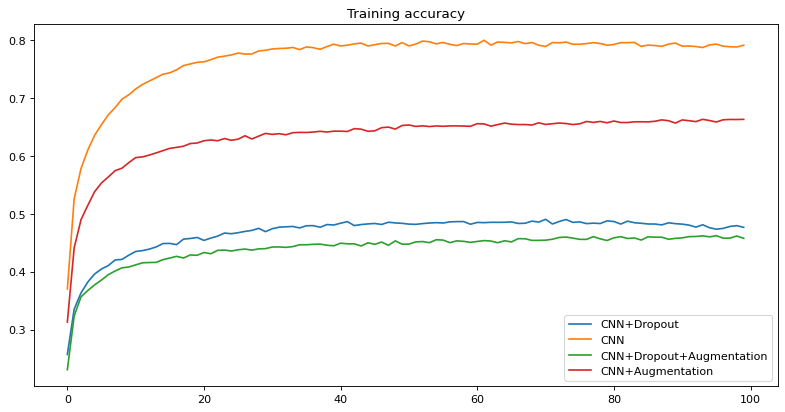

In [ ]:
epochs = np.arange(100)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs, acc_7_train, label="CNN+Dropout")
plt.plot(epochs, acc_8_train, label="CNN")
plt.plot(epochs, acc_9_train, label="CNN+Dropout+Augmentation")
plt.plot(epochs, acc_10_train, label="CNN+Augmentation")
plt.legend()
plt.title("Training accuracy")
plt.show()

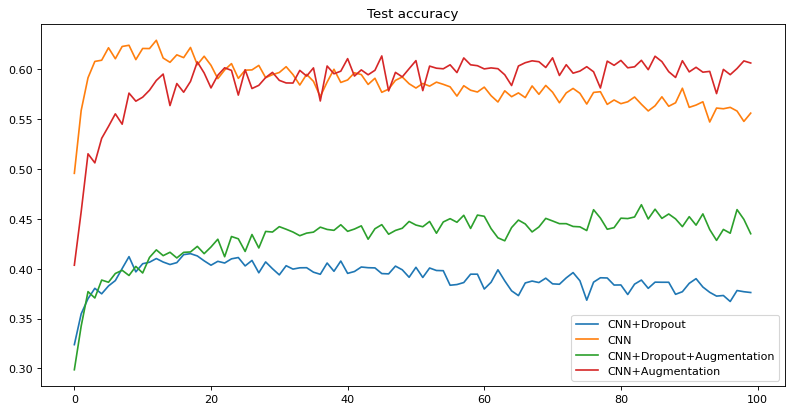

In [ ]:
epochs = np.arange(100)
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(epochs, acc_7_test, label="CNN+Dropout")
plt.plot(epochs, acc_8_test, label="CNN")
plt.plot(epochs, acc_9_test, label="CNN+Dropout+Augmentation")
plt.plot(epochs, acc_10_test, label="CNN+Augmentation")
plt.legend()
plt.title("Test accuracy")
plt.show()

1. The training accuracy always keep increasing. CNN without dropout or data augmentation has the highest training accuracy. This model is overfitted.

2. A lightweighted CNN network can't hold all information from a large dataset. If the model capacity is already low, lowering it further by adding dropout will hurt performance. As you can see the training/test accuracy becomes lower.

3. Data augmentation (horizontal/vertical flip) will reduce the overfitting problem. It will make the training accuracy and test accuracy closer. And test accuracy won't decrease even when training for large epochs.


#Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

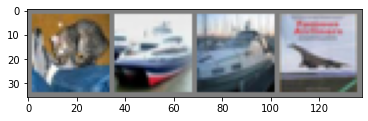

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

let’s load back in our saved model 

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

now let us see what the neural network thinks these examples above are:

In [ ]:
outputs = net(images)

The outputs are probabilities for the 10 classes. The higher the probability for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest probability:

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        # print(outputs.data.shape)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


what are the classes that performed well, and the classes that did not perform well:

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            # print(label, prediction, classes[label])
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 35.5 %
Accuracy for class: car   is 65.8 %
Accuracy for class: bird  is 42.8 %
Accuracy for class: cat   is 34.3 %
Accuracy for class: deer  is 54.9 %
Accuracy for class: dog   is 53.2 %
Accuracy for class: frog  is 60.1 %
Accuracy for class: horse is 72.1 %
Accuracy for class: ship  is 82.0 %
Accuracy for class: truck is 56.5 %
